In [3]:
pip install numpy

     -------------------------------------- 14.6/14.6 MB 793.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

     ------------------------------------ 288.2/288.2 kB 455.7 kB/s eta 0:00:00
     -------------------------------------- 10.4/10.4 MB 756.2 kB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 717.3 kB/s eta 0:00:00
     ------------------------------------ 163.6/163.6 kB 983.1 kB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 498.1/498.1 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
titanic=sns.load_dataset("titanic")

In [116]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [156]:
tdf=titanic

In [157]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [159]:
tdf.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [160]:
tdf.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [171]:
col=['survived', 'pclass', 'sex', 'sibsp', 'parch',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']

In [165]:
tdf.shape

(891, 15)

In [168]:
pd.unique(tdf[['survived', 'pclass', 'sex', 'parch',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']].values.ravel('k'))

array([0, 1, 3, 2, 'male', 'female', 5, 4, 6, 'S', 'C', 'Q', nan, 'Third',
       'First', 'Second', 'man', 'woman', 'child', 'E', 'G', 'D', 'A',
       'B', 'F', 'Southampton', 'Cherbourg', 'Queenstown', 'no', 'yes'],
      dtype=object)

In [174]:
for u in col:
    print(f"{u} : {pd.unique(tdf[u])}")

survived : [0 1]
pclass : [3 1 2]
sex : ['male' 'female']
sibsp : [1 0 3 4 2 5 8]
parch : [0 1 2 5 3 4 6]
embarked : ['S' 'C' 'Q' nan]
class : ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
who : ['man' 'woman' 'child']
adult_male : [ True False]
deck : [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
embark_town : ['Southampton' 'Cherbourg' 'Queenstown' nan]
alive : ['no' 'yes']
alone : [False  True]


In [176]:
tdf.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [178]:
tdf.drop(["deck"],axis=1,inplace=True)

In [180]:
tdf.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [182]:
tdf.dropna(inplace=True)

In [184]:
tdf.shape
tdf.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<AxesSubplot: ylabel='age'>

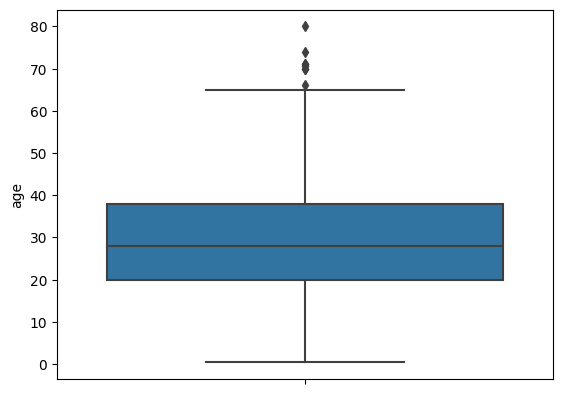

In [185]:
sns.boxplot(y="age",data=tdf)

C:\Users\HP\AppData\Local\Temp\ipykernel_400\3471753233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tdf["age"])


<AxesSubplot: xlabel='age', ylabel='Density'>

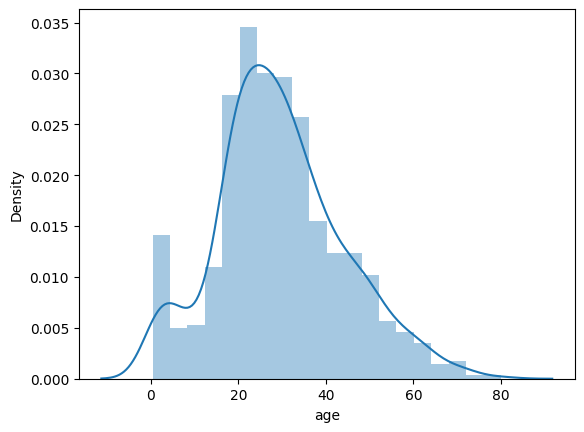

In [187]:
sns.distplot(tdf["age"])

<AxesSubplot: xlabel='age', ylabel='Density'>

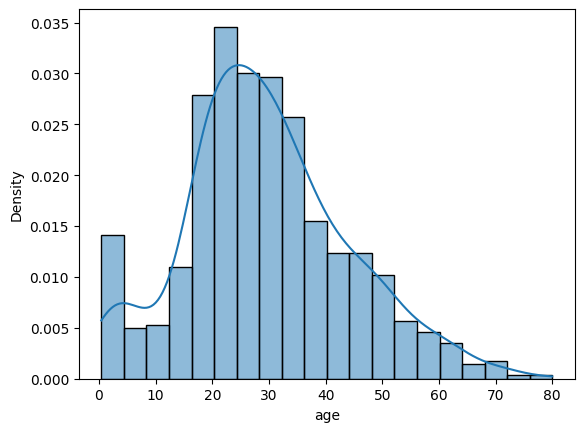

In [191]:
sns.histplot(tdf["age"],kde=True,stat="density" )

In [197]:
tdf=tdf[tdf["age"]<65]

In [198]:
tdf.shape


(697, 14)

In [ ]:
sns.boxplot(y="age",data=tdf)

In [201]:
tdf=tdf[tdf["fare"]<300]

<AxesSubplot: ylabel='fare'>

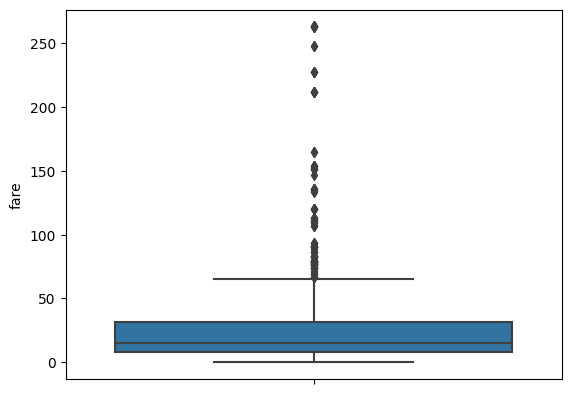

In [202]:
sns.boxplot(y="fare",data=tdf)

In [210]:
cor_tdf=tdf.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_400\3155092501.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_tdf=tdf.corr()


<AxesSubplot: >

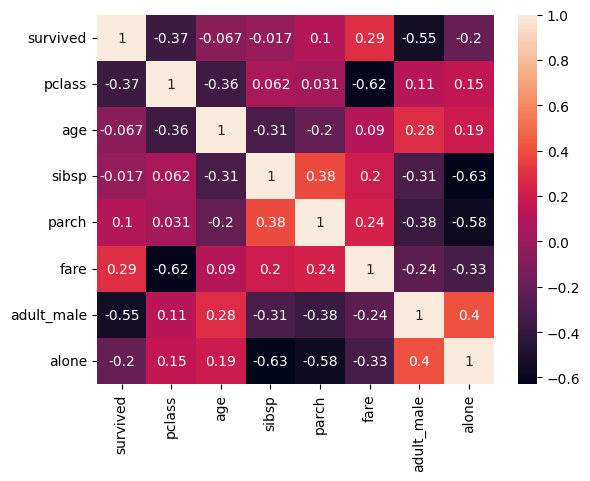

In [212]:
sns.heatmap(cor_tdf,annot=True)

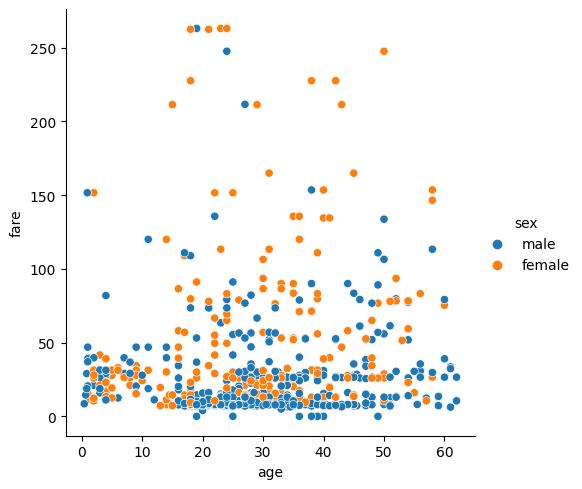

In [215]:
sns.relplot(x="age",y="fare",data=tdf,hue="sex")

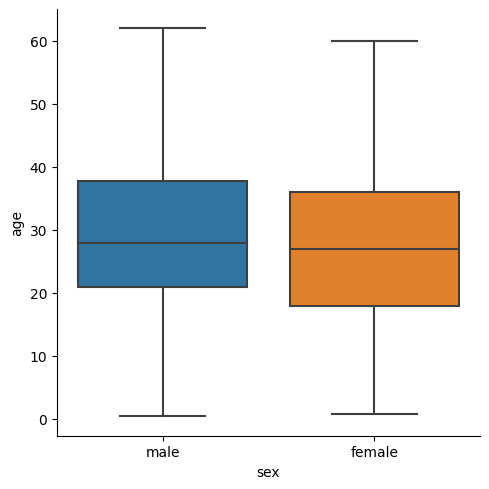

In [218]:
sns.catplot(x="sex",y="age",data=tdf,kind="box")

In [219]:
tdf["fare_log"]=np.log(tdf['fare'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


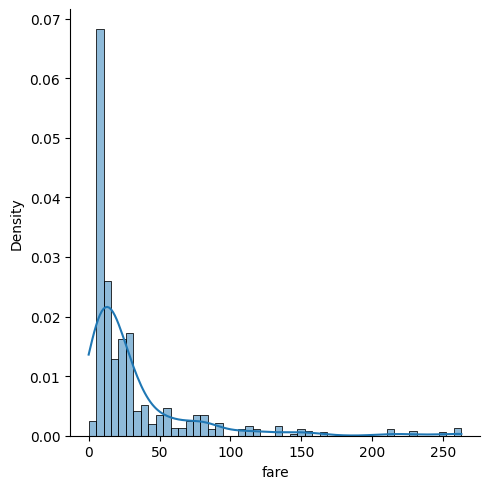

In [220]:
sns.displot(tdf["fare"],kde=True,stat="density")

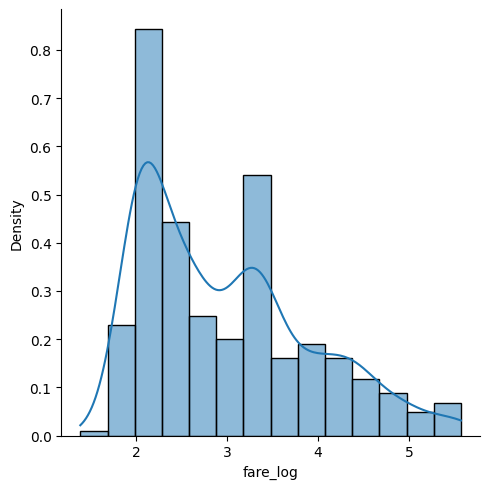

In [221]:
sns.displot(tdf["fare_log"],kde=True,stat="density")